<a href="https://colab.research.google.com/github/bluepeach1121/Pytorch_tutorials/blob/main/01pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
what_were_covering = {1: 'data (prepare and load)',
                      2: 'build model',
                      3: 'fitting the model to the data',
                      4: 'making predictions and evaluating a model (inference)',
                      5: 'saving and loading a model',
                      6: 'putting it all together'}
what_were_covering

{1: 'data (prepare and load)',
 2: 'build model',
 3: 'fitting the model to the data',
 4: 'making predictions and evaluating a model (inference)',
 5: 'saving and loading a model',
 6: 'putting it all together'}

In [ ]:
import torch
from torch import nn #contains all of pythons building blocks for ML
import matplotlib.pyplot as plt


1. convert data into numerical format
2. build a model to learn pattern in numbers
*lets create a model with linear regression*
we'll use a linear regression formula to make a straight line with known parameters

In [ ]:
#create known parameters
weight = 0.7
bias = 0.3

#create
start = 0
end = 1
step = 0.02 #learning rate
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10], len(X), len(y)

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 50,
 50)

### splitting data into training and test sets (one of the most important concepts in ML/ data science)

In [ ]:
#create a train/test split
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

how might we better visualize data.

In [ ]:
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = None):
    """
    plots training data, test data nad compares predictions.
    """

    plt.figure(figsize=(10, 7))

    #plot training data in blue
    plt.scatter(train_data, train_labels, c='b', s=4, label="training data")

    #plot test data in green
    plt.scatter(test_data, test_labels, c='g', s=4, label='Testing data')

    #are there predictions?
    if predictions is not None:
        #plot the predictions if they exist
        plt.scatter(test_data, predictions, c='r', s=4, label='Predictions')

    #show the legend
    plt.legend(prop={'size': 14})



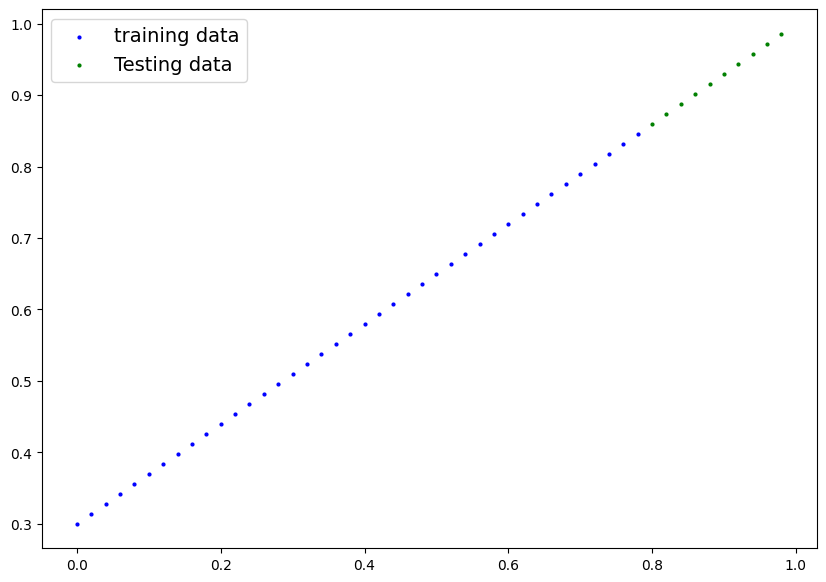

In [ ]:
plot_predictions();

we are going to build a model to predict future values

## 2. build model

our first pytorch model

what our model does:
* start with random values (weight & bias)
* look at training data and adjust the random values to better represent the ideal values used to create the data.

How does it do so?
through 2 main algorithms:
1. gradient descent
2. backpropagation

**note:** `nn.Module` is a subclass. `forward(*input)` defines the computation performed at every cell. any subclass of `nn.module` needs to override `forward()`

#pytorch model building essentials

* torch.nn --> contains all of the building blocks for computational graphs
* torch.nn.parameter - what parameters should our model try to learn, often a pytorch layer from torch.nn will set these for us.
* torch.nn.Module -- the base class for all neural network modules, if you subclass it, you should override forward()
* torch.optim -- this is where the optimizers in pytorch are, they help with gradient descent.
* def forward() --> all nn.module subclasses require you to overwrite forward(), this method defines what happens in the forward computation

### checking the contents of our pytorch model
 * we can our model parameters or whats inside our model using `nn.parameter()`.


In [63]:
import torch
from torch import nn

# Define the model
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, # start with a random weight and try to ad
                                                requires_grad=True,
                                                dtype=torch.float))

        self.bias = nn.Parameter(torch.randn(1,
                                             requires_grad=True,
                                             dtype=torch.float))

    #forward method to define the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias

# Set the random seed
torch.manual_seed(42)

# Instantiate the model
model_0 = LinearRegressionModel()

# Print the parameters
list(model_0.parameters())


[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [64]:
# list named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

# making prediction using `torch.inference_mode()`
to check our model's predictive power, lets see how well it predicts `y_test` based on `X_test`

when we pass data through our model, its going to run it through the `forward()` method

In [65]:
print(f"{X_test} {y_test}")

tensor([[0.8000],
        [0.8200],
        [0.8400],
        [0.8600],
        [0.8800],
        [0.9000],
        [0.9200],
        [0.9400],
        [0.9600],
        [0.9800]]) tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])


In [69]:
#make predictions with model
with torch.inference_mode():
    y_preds = model_0(X_test) #takes in X_test as inputs and returns y_test

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [70]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

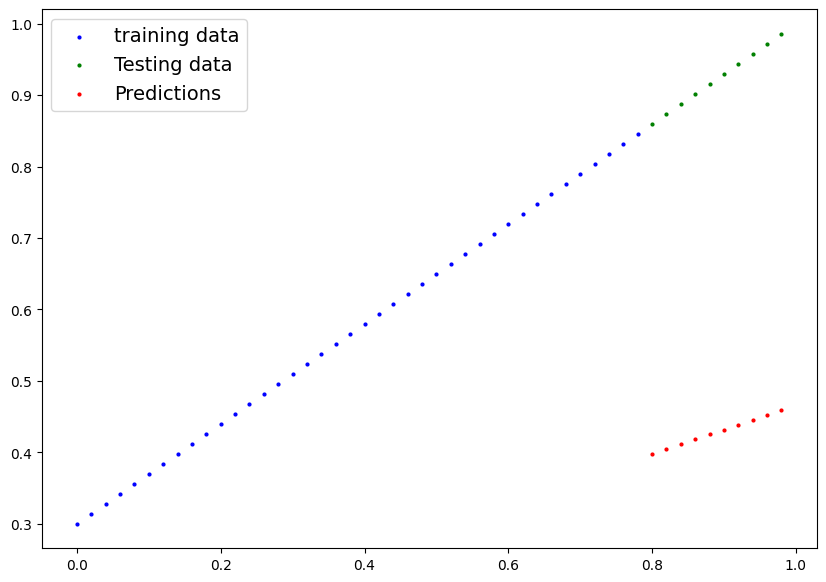

In [68]:
plot_predictions(predictions= y_preds)